<a href="https://colab.research.google.com/github/darwinleung/pokemon/blob/main/Pokemon_TCG_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mulligan

In [4]:
import math
from math import comb
from math import perm

60 cards in deck, only X basic pokemons, draw 7 cards for starting hand, if none of the starting hand is pokemon, then will do a mulligan, what is the expected number of mulligan?

P(not mulligan) = P(at least 1 pokemon)

                   = 1 - P(zero pokemon)
                
                   = 1 - 56P7 / 60P7

In [27]:
def prob_of_mulligan(num_specific_card=4, total_cards=60, hand_size=7):
    """
    Calculate the probability of not drawing a specific card in an initial hand of a card game.
    
    :param num_specific_card: Number of specific cards in the deck.
    :param total_cards: Total number of cards in the deck.
    :param hand_size: Number of cards drawn in the initial hand.
    :return: Probability of not drawing the specific card in the initial hand.
    """
    return math.perm(total_cards - num_specific_card, hand_size) / math.perm(total_cards, hand_size)


In [28]:
prob_of_mulligan(num_specific_card=4)

0.6005003742553344

In [20]:
def expected_mulligans(prob):
    return 1/(1-prob)-1

In [21]:
expected_mulligans(prob_of_mulligan(4))

1.503131256095683

In [22]:
def n_mulligan_prob(num_specific_card=4, mulligan_count=0):
  p = 1-prob_of_mulligan(num_specific_card)
  return ((1-p)**mulligan_count)*p

In [23]:
n_mulligan_prob(4,0)

0.3994996257446656

In [24]:
def mulligan_count_prob(num_specific_card=4, n=10):
  prob = prob_of_mulligan(num_specific_card)
  print("Expected mulligan count: {:.02f}".format(expected_mulligans(prob)))
  sum = 0
  for i in range(n):
    sum += n_mulligan_prob(num_specific_card,i)
    print("Probability of having {} mulligans: {:.02f}%".format(i,n_mulligan_prob(num_specific_card,i)*100))
  print("Probability of having {}+ mulligans: {:.02f}%".format(n,(1-sum)*100))

In [25]:
mulligan_count_prob(1)

Expected mulligan count: 7.57
Probability of having 0 mulligans: 11.67%
Probability of having 1 mulligans: 10.31%
Probability of having 2 mulligans: 9.10%
Probability of having 3 mulligans: 8.04%
Probability of having 4 mulligans: 7.10%
Probability of having 5 mulligans: 6.27%
Probability of having 6 mulligans: 5.54%
Probability of having 7 mulligans: 4.90%
Probability of having 8 mulligans: 4.32%
Probability of having 9 mulligans: 3.82%
Probability of having 10+ mulligans: 28.92%


Expected mulligan count: 1.50
Probability of having 0 mulligans: 39.95%
Probability of having 1 mulligans: 23.99%
Probability of having 2 mulligans: 14.41%
Probability of having 3 mulligans: 8.65%
Probability of having 4 mulligans: 5.19%
Probability of having 5 mulligans: 3.12%
Probability of having 6 mulligans: 1.87%
Probability of having 7 mulligans: 1.12%
Probability of having 8 mulligans: 0.68%
Probability of having 9 mulligans: 0.41%
0.9939027665424445
Probability of having 10+ mulligans: 0.61%


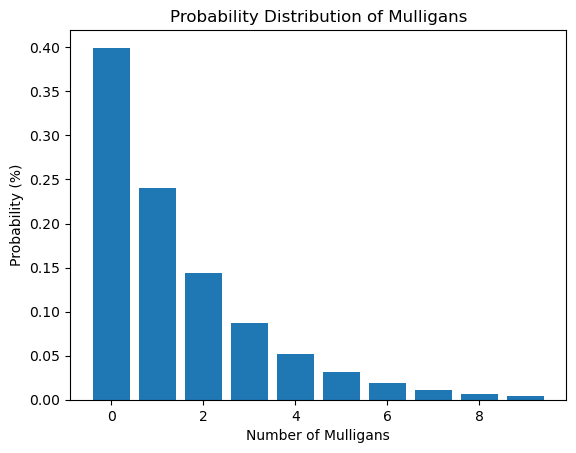

In [36]:
# prompt: build a bar chart to show the probability distribution above

import matplotlib.pyplot as plt

def mulligan_count_prob_chart(num_specific_card=4, n=10):
  prob = prob_of_mulligan(num_specific_card)
  print("Expected mulligan count: {:.02f}".format(expected_mulligans(prob)))
  x_axis = []
  y_axis = []
  sum = 0
  for i in range(n):
    x_axis.append(i)
    y = n_mulligan_prob(num_specific_card,i)
    y_axis.append(y)
    sum += y
    print("Probability of having {} mulligans: {:.02f}%".format(i,y * 100))
  print(sum)
  print("Probability of having {}+ mulligans: {:.02f}%".format(n,(1-sum)*100))
  plt.bar(x_axis,y_axis)
  plt.xlabel("Number of Mulligans")
  plt.ylabel("Probability (%)")
  plt.title("Probability Distribution of Mulligans")
  plt.show()

mulligan_count_prob_chart(4)


# No. of specific cards in starting hands

In [ ]:
1-prob_of_mulligan(2, 59, 7)

0.22501461133839862

\[
P(K=0) = \frac{\binom{X}{0} \cdot \binom{N-X}{n}}{\binom{N}{n}}
\]\

\[
P(K=0) = \frac{\binom{X}{0} \cdot \binom{N-X}{n}}{\binom{N}{n}}
\]

In [2]:
# prompt: write a function to calculate the probability of drawing 7 cards with k number of a certain card in a 60 cards deck

def prob_k_cards(k, num_specific_card=4, total_cards=59, hand_size=7):
  """
  Calculates the probability of drawing exactly k specific cards in a hand.

  Args:
    k: The number of specific cards to draw.
    total_cards: The total number of cards in the deck.
    hand_size: The size of the hand being drawn.
    num_specific_card: The number of specific cards in the deck.

  Returns:
    The probability of drawing exactly k specific cards.
  """
  return (comb(num_specific_card, k) * comb(total_cards - num_specific_card, hand_size - k)) / comb(total_cards, hand_size)


In [6]:
prob_k_cards(0,1)

0.8813559322033898

In [63]:
sum = 0
for i in range(5):
  sum += prob_k_cards(i,4)
  print(prob_k_cards(i,4))
print(sum)

0.5948352763850011
0.3399058722200006
0.06118305699960011
0.003998892614352948
7.690178104524901e-05
1.0


In [38]:
def specific_card_count_prob(num_specific_card=4):
  for i in range(num_specific_card+1):
    print("Probability of having {} specific cards: {:.02f}%".format(i,prob_k_cards(i,num_specific_card)*100))

In [40]:
specific_card_count_prob(4)

Probability of having 0 specific cards: 59.48%
Probability of having 1 specific cards: 33.99%
Probability of having 2 specific cards: 6.12%
Probability of having 3 specific cards: 0.40%
Probability of having 4 specific cards: 0.01%


# Probability of prizing a specific card

# Probability of starting with that 1 bad starter
e.g. luminion

## Appendix

Resources:
https://sixprizes.com/2013/01/13/themathtcg-the-probabilities-behind/#39577-3-1-the-probability-of-not-having-a-mulligan
https://www.pojo.com/Features/X-Act/2005/Odds%20in%20Pokemon%203.htm
https://limitlesstcg.com/tools/drawcalc
https://www.justinbasil.com/guide/appendix4


# Testing PokemonTCG API

In [8]:
from pokemontcgsdk import Card
from pokemontcgsdk import Set
from pokemontcgsdk import Type
from pokemontcgsdk import Supertype
from pokemontcgsdk import Subtype
from pokemontcgsdk import Rarity
%pprint

Pretty printing has been turned OFF


In [3]:
from pokemontcgsdk import RestClient

RestClient.configure('f6461fa4-0eb0-4b9b-a404-e846742da4e5')

In [13]:
cards = Card.all()

In [14]:
cards

[Card(abilities=[Ability(name='Jamming', text="After your opponent plays a Supporter card from his or her hand, put 1 damage counter on each of your opponent's Pokémon. You can't use more than 1 Jamming Poké-Body each turn.", type='Poké-Body')], artist='Kouki Saitou', ancientTrait=None, attacks=[Attack(name='Cluster Bolt', cost=['Lightning', 'Colorless', 'Colorless'], convertedEnergyCost=3, damage='70', text="You may discard all Lightning Energy attached to Ampharos. If you do, this attack does 20 damage to each of your opponent's Benched Pokémon that has any Energy cards attached to it. (Don't apply Weakness and Resistance for Benched Pokémon.)")], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/dp3-1', updatedAt='2024/09/11', prices=CardmarketPrices(averageSellPrice=1.12, lowPrice=0.1, trendPrice=2.58, germanProLow=0.0, suggestedPrice=0.0, reverseHoloSell=0.0, reverseHoloLow=0.29, reverseHoloTrend=2.75, lowPriceExPlus=1.0, avg1=0.5, avg7=2.15, avg30=1.51, reverseHo

In [11]:

print(card)

Card(abilities=None, artist='Eske Yoshinob', ancientTrait=None, attacks=[Attack(name='Poison Powder', cost=['Grass', 'Colorless', 'Colorless'], convertedEnergyCost=3, damage='60', text="Your opponent's Active Pokémon is now Poisoned."), Attack(name='Jungle Hammer', cost=['Grass', 'Grass', 'Colorless', 'Colorless'], convertedEnergyCost=4, damage='90', text='Heal 30 damage from this Pokémon.')], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/xy1-1', updatedAt='2024/09/11', prices=CardmarketPrices(averageSellPrice=21.57, lowPrice=2.0, trendPrice=16.92, germanProLow=0.0, suggestedPrice=0.0, reverseHoloSell=0.0, reverseHoloLow=0.0, reverseHoloTrend=4.37, lowPriceExPlus=3.75, avg1=120.0, avg7=21.57, avg30=8.3, reverseHoloAvg1=3.99, reverseHoloAvg7=4.56, reverseHoloAvg30=4.47)), convertedRetreatCost=4, evolvesFrom=None, flavorText=None, hp='180', id='xy1-1', images=CardImage(small='https://images.pokemontcg.io/xy1/1.png', large='https://images.pokemontcg.io/xy1/1_hires.png

In [53]:
zard_card = Card.find('sv3-125')

In [54]:
zard_card

Card(abilities=[Ability(name='Infernal Reign', text='When you play this Pokémon from your hand to evolve 1 of your Pokémon during your turn, you may search your deck for up to 3 Basic Fire Energy cards and attach them to your Pokémon in any way you like. Then, shuffle your deck.', type='Ability')], artist='5ban Graphics', ancientTrait=None, attacks=[Attack(name='Burning Darkness', cost=['Fire', 'Fire'], convertedEnergyCost=2, damage='180+', text='This attack does 30 more damage for each Prize card your opponent has taken.')], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/sv3-125', updatedAt='2024/09/11', prices=CardmarketPrices(averageSellPrice=7.72, lowPrice=4.95, trendPrice=7.43, germanProLow=0.0, suggestedPrice=0.0, reverseHoloSell=0.0, reverseHoloLow=0.0, reverseHoloTrend=0.0, lowPriceExPlus=5.0, avg1=7.13, avg7=6.62, avg30=7.68, reverseHoloAvg1=0.0, reverseHoloAvg7=0.0, reverseHoloAvg30=0.0)), convertedRetreatCost=2, evolvesFrom='Charmeleon', flavorText=None, 

In [9]:
sf_cards = Card.where(q='set.name:shrouded')
twm_cards = Card.where(q='set.name:twilight')

In [15]:
sf_dusk = Card.where(q='set.name:shrouded name:dusknoir')

In [16]:
sf_dusk

[Card(abilities=[Ability(name='Cursed Blast', text="Once during your turn, you may put 13 damage counters on 1 of your opponent's Pokémon. If you use this Ability, this Pokémon is Knocked Out.", type='Ability')], artist=None, ancientTrait=None, attacks=[Attack(name='Shadow Bind', cost=['Psychic', 'Psychic', 'Colorless'], convertedEnergyCost=3, damage='150', text="During your opponent's next turn, the Defending Pokémon can't retreat.")], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/sv6pt5-20', updatedAt='2024/09/16', prices=CardmarketPrices(averageSellPrice=0.23, lowPrice=0.02, trendPrice=0.21, germanProLow=0.0, suggestedPrice=0.0, reverseHoloSell=0.32, reverseHoloLow=0.02, reverseHoloTrend=0.33, lowPriceExPlus=0.02, avg1=0.17, avg7=0.19, avg30=0.21, reverseHoloAvg1=0.29, reverseHoloAvg7=0.31, reverseHoloAvg30=0.31)), convertedRetreatCost=3, evolvesFrom='Dusclops', flavorText=None, hp='160', id='sv6pt5-20', images=CardImage(small='https://images.pokemontcg.io/sv6pt

In [10]:
len(twm_cards)

226

In [11]:
len(sf_cards)

99

In [12]:
print(sf_cards[0])

Card(abilities=None, artist=None, ancientTrait=None, attacks=[Attack(name='Splashing Dodge', cost=['Grass'], convertedEnergyCost=1, damage='10', text="Flip a coin. If heads, during your opponent's next turn, prevent all damage from and effects of attacks done to this Pokémon.")], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/sv6pt5-1', updatedAt='2024/09/16', prices=CardmarketPrices(averageSellPrice=0.03, lowPrice=0.01, trendPrice=0.03, germanProLow=0.0, suggestedPrice=0.0, reverseHoloSell=0.07, reverseHoloLow=0.02, reverseHoloTrend=0.05, lowPriceExPlus=0.01, avg1=0.02, avg7=0.03, avg30=0.03, reverseHoloAvg1=0.05, reverseHoloAvg7=0.05, reverseHoloAvg30=0.06)), convertedRetreatCost=1, evolvesFrom=None, flavorText=None, hp='40', id='sv6pt5-1', images=CardImage(small='https://images.pokemontcg.io/sv6pt5/1.png', large='https://images.pokemontcg.io/sv6pt5/1_hires.png'), legalities=Legality(unlimited='Legal', expanded='Legal', standard='Legal'), regulationMark='H', name=

In [19]:
twm_cards[0].tcgplayer

TCGPlayer(url='https://prices.pokemontcg.io/tcgplayer/sv6-1', updatedAt='2024/09/16', prices=TCGPrices(normal=TCGPrice(low=0.01, mid=0.05, high=100.0, market=0.02, directLow=None), holofoil=None, reverseHolofoil=TCGPrice(low=0.01, mid=0.1, high=2.95, market=0.06, directLow=0.04), firstEditionHolofoil=None, firstEditionNormal=None))

In [26]:
sets = Set.where(q='name:shrouded')

In [27]:
sets

[Set(id='sv6pt5', images=SetImage(symbol='https://images.pokemontcg.io/sv6pt5/symbol.png', logo='https://images.pokemontcg.io/sv6pt5/logo.png'), legalities=Legality(unlimited='Legal', expanded='Legal', standard='Legal'), name='Shrouded Fable', printedTotal=64, ptcgoCode='SFA', releaseDate='2024/08/02', series='Scarlet & Violet', total=99, updatedAt='2024/08/02 15:00:00')]